# Load the data and make a datetime index.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

In [25]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df=pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


**Convert the date column to datetime dtype.**

In [26]:
df['date']=pd.to_datetime(df['date'],format='%Y%m%d')

**Set the date column as the index.**

In [27]:
df=df.set_index(['date'])
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


**Filter out only the required data**

- Keep only data from the year 2000 or later.

- Keep only the following features:
  - precipitation
  - mean_temp
  - min_temp
  - max_temp
  - snow_depth

In [29]:
df = df.loc['2000':,['precipitation','mean_temp','min_temp','max_temp','snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


**Impute any missing values.**

In [30]:
# Check for total missing values for each column
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [33]:
# Fill missing values for precipitation and snow_depth with '0'
df['precipitation']=df['precipitation'].fillna(0)
df['snow_depth']=df['snow_depth'].fillna(0)

In [32]:
# Fill missing values for mean_temp,min_temp, and max_tem with interpolate method
df['mean_temp']=df['mean_temp'].interpolate()
df['min_temp']=df['min_temp'].interpolate()
df['max_temp']=df['max_temp'].interpolate()

In [34]:
# confirmed missing values have been filled 
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Answer the Questions with Visualizations

## 1. What month had the most precipitation between 2000 through 2010?

In [38]:
# Make a temp df 
df_q1=df.loc['2000':'2010',['precipitation']]
df_q1

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4


**Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method**

In [107]:
q1_res=df_q1.resample('MS').sum().copy()

**Find the date and corresponding value for the max precipitation.**

In [108]:
max_precipitation=q1_res['precipitation'].max()
max_precipitation_date=q1_res['precipitation'].idxmax()

In [109]:
print(f"Max precipitation date:{max_precipitation_date.strftime('%Y-%m')}")
print(f"Max precipitation:{max_precipitation}")

Max precipitation date:2009-11
Max precipitation:138.4


**Plot the feature and time period that corresponds to the question.**

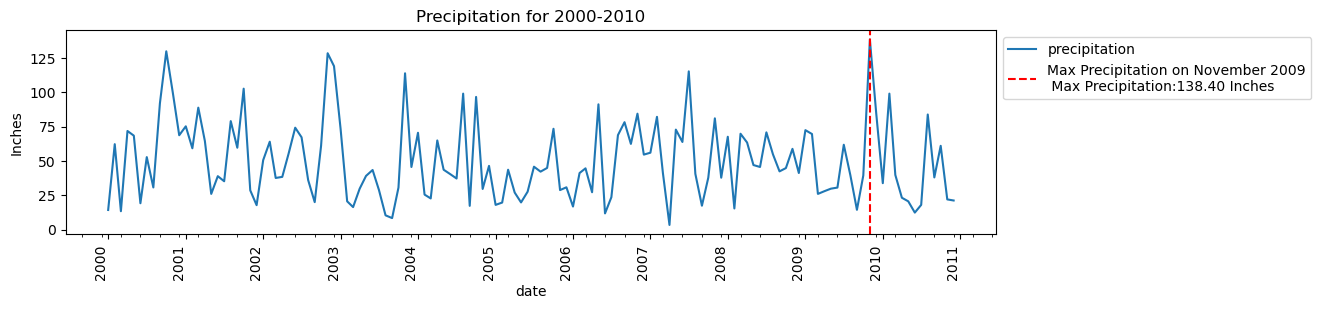

In [110]:
fig,ax=plt.subplots(figsize=(12,3))
q1_res.plot(ax=ax,x_compat=True)

ax.set(title='Precipitation for 2000-2010',ylabel='Inches')
major_loc=mdates.YearLocator(1)
major_fmt=mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

minor_loc=mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(minor_loc)

fig=ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

ax.axvline(x=max_precipitation_date, color='red', linestyle='--', label=f'Max Precipitation on {max_precipitation_date.strftime("%B %Y")}\n Max Precipitation:{max_precipitation:.2f} Inches')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## 2. Which year between 2000-2020 had the coolest average temperature?

In [111]:
# Make a temp df 
df_q2=df.loc['2000':'2020',['mean_temp']]
df_q2

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


**Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.**

In [114]:
q2_res=df_q2.resample('Y').mean().copy()

**Determine the year and value for the lowest mean temp.**

In [121]:
min_temp=q2_res['mean_temp'].min()
min_year=q2_res['mean_temp'].idxmin()

In [122]:
print(f"Min mean temp year:{min_year.strftime('%Y')}")
print(f"Min temp:{min_temp}")

Min mean temp year:2010
Min temp:10.657397260273973


**Plot the feature and time period that corresponds to the question.**

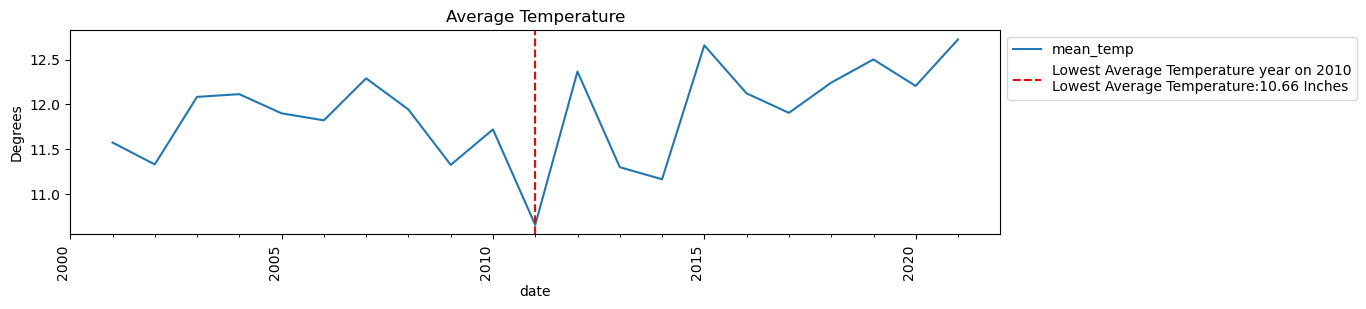

In [130]:
fig,ax=plt.subplots(figsize=(12,3))
ax.set(title='Average Temperature',ylabel='Degrees')
q2_res.plot(ax=ax,x_compat=True)
major_loc=mdates.YearLocator(5)
major_fmt=mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

minor_loc=mdates.YearLocator(1)
ax.xaxis.set_minor_locator(minor_loc)

ax.axvline(x=min_year, color='red', linestyle='--', label=f'Lowest Average Temperature year on {min_year.strftime("%Y")}\nLowest Average Temperature:{min_temp:.2f} Inches')

fig=ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show();